# A problem with sympy integral

Description: for the integral of $\left|\cos(x)\right|$, sympy only gives correct results for the $\left[0, 2\pi\right]$ interval. This is apparent from the indefinite integral (on the domain of real numbers), as well as from the definite integrals it calculates.

## The indefinite integral of $f(x) = \left|\cos(x)\right|$

In [1]:
%autosave 0
from IPython.display import Image

Autosave disabled


### The graph of the primitive function F

A version with, and a version without jump discontinuities (cases where $\cos(x)=0$) in GeoGebra ([see also ggb file](integral_abs_cos.ggb)):

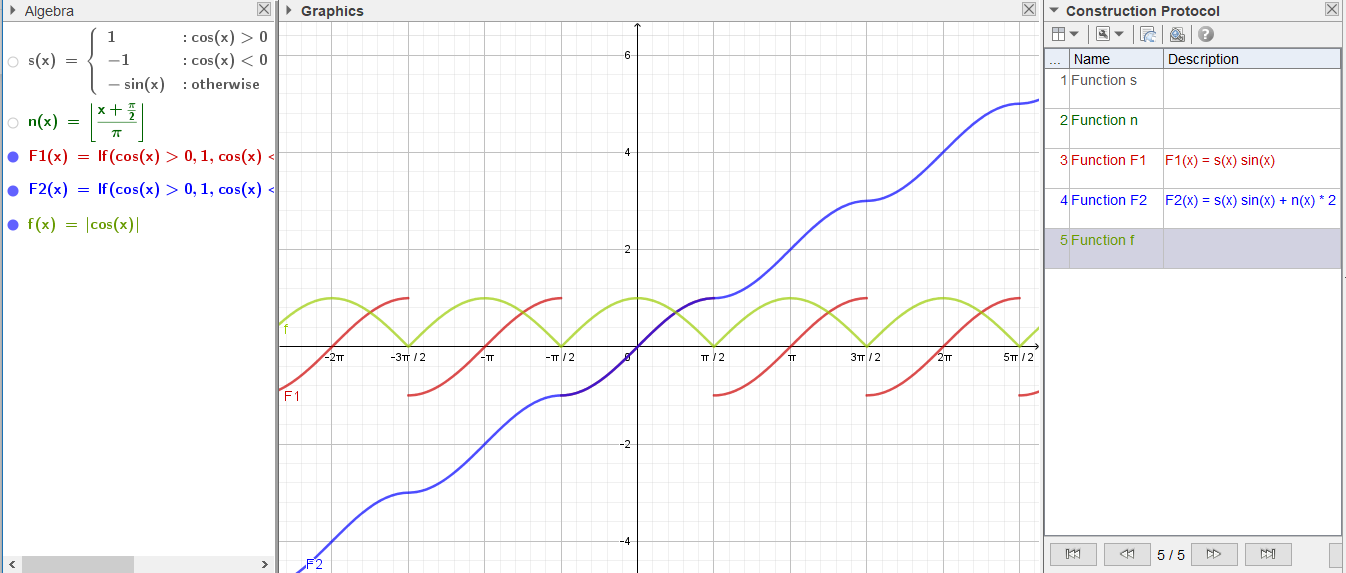

In [2]:
display(Image(filename="integral_cos_abs_plot.png", width="100%"))

The continuous antiderivative F2 can be used directly with the Newton-Leibniz formula to get a definite integral. But F1 with discontinuities can also be used if care is taken to add up definite integrals in continuous subdomains of F1 (and taking the limit of F1 at the discontinuities). Cf. [a blog post on Mathematica](https://blog.wolfram.com/2008/01/19/mathematica-and-the-fundamental-theorem-of-calculus/):

> _works by detecting discontinuities in the antiderivative, and then breaking up the integration region into parts, and carefully taking directional limits at the discontinuity points_

Also, what happens when we get the continuous F2 from F1 is the following:

>  _Every calculus student knows that antiderivatives can contain an arbitrary additive constant. But in fact, there’s more arbitrariness than that: one can add different constants on different parts of the interval._

In [3]:
from IPython.display import IFrame

In [4]:
IFrame(src="https://blog.wolfram.com/2008/01/19/mathematica-and-the-fundamental-theorem-of-calculus/", width="100%", height=500)

### F according to sympy

In [5]:
from sympy import *
x, y = symbols("x y", real=True)
eq1 = sqrt(cos(x)**2)
print("Integrand:")
display(eq1)
eq2 = integrate(eq1, x )
print("Its integral:")
display(eq2)

Integrand:


Abs(cos(x))

Its integral:


Piecewise((-sin(x), x <= 0), (sin(x), x <= pi/2), (2 - sin(x), x <= 3*pi/2), (sin(x) + 4, x <= 2*pi), (4 - sin(x), True))

The cases between $0$ and $2\pi$ are correct, but outside of that, the cyclic nature of the function is not taken into account.

### Definitions to display sympy's solutions

In [6]:
def integrate_def(a, b, eq=eq1, verbose=True):
    if verbose:
        print("Integral according to sympy of")
        display(eq)
        print("from")
        display(a)
        print("to")
        display(b)
        print("is:")
    res = integrate(eq1, (x, a, b) )
    return res
    
def integrate_def_NL(a, b, eq=eq2):
    print("F is")
    display(eq)
    b_eval = eq.evalf(subs={x:b}) 
    a_eval = eq.evalf(subs={x:a})
    print("b is")
    display(b)
    print("F(b) is")
    display(b_eval)
    print("a is")
    display(a)
    print("F(a) is")
    display(a_eval)
    print("F(b) - F(a) is")
    return b_eval - a_eval


## Some definite integrals by sympy

In [7]:
if True:
    print("A correctly calculated integral by sympy:")
    a = pi/4
    b = 3*pi/4
    display(integrate_def(a, b))
    print("The value should be")
    display(2 - sqrt(2))
    
    
    print("\nAn incorrectly calculated integral:")
    a = -pi/2
    b = pi/2
    display(integrate_def(a, b))
    print("The value should be", 2)
    
    print("\nAccording to sympy...")
    res = integrate_def_NL(a, b)
    display(res)

A correctly calculated integral by sympy:
Integral according to sympy of


Abs(cos(x))

from


pi/4

to


3*pi/4

is:


2 - sqrt(2)

The value should be


2 - sqrt(2)


An incorrectly calculated integral:
Integral according to sympy of


Abs(cos(x))

from


-pi/2

to


pi/2

is:


0

The value should be 2

According to sympy...
F is


Piecewise((-sin(x), x <= 0), (sin(x), x <= pi/2), (2 - sin(x), x <= 3*pi/2), (sin(x) + 4, x <= 2*pi), (4 - sin(x), True))

b is


pi/2

F(b) is


1.00000000000000

a is


-pi/2

F(a) is


1.00000000000000

F(b) - F(a) is


0

## A correct manual definition of F

F with jump discontinuities is (sort of) easy:

$$\mathbf{sign}(\cos(x))\cdot\sin(x) + C$$

(For discontinuities, where $\cos(x)=0$, we must decide for F to take, e.g., $-1$ (and not $1$). The **sign** function will be tweaked to accommodate this below.)

In [8]:
import numpy as np

def sign_sin(u):
    if cos(u) > 0:
        return 1
    if cos(u) < 0:
        return -1
    return -1*sin(u)
    
def n_times_2(u):
    return np.floor( (u+pi/2) / pi )
    
def F1_with_discont(u):
    '''return the value of primitive function (with discontinuities) of |cos(x)| at u'''
    return sign_sin(u) * sin(u)

def F2_wo_discont(u):
    '''return the value of the integral function (without discontinuities) of |cos(x)| at u'''
    return sign_sin(u) * sin(u) + n_times_2(u) * 2

In [9]:
if False:
    ## to check values of the two functions at various points
    u = 5*pi/2
    display(u)
    display(F1_with_discont(u))
    display(F2_wo_discont(u))

**And a definition to calculate a definite integral from a to b using F2:**

In [10]:
def integrate_def_manual(a, b, verbose=True):
    '''Calculate definite integral from a to b manually.'''
    print("\nCalculating definite integral from a to b manually...")
    fb = F2_wo_discont(b)
    fa = F2_wo_discont(a)
    if verbose:
        print("")
        print("For b...")
        display(b)
        print("...F(b) is")
        display(fb)
        print("For a...")
        display(a)
        print("...F(a) is")
        display(fa)
        print("The definite integral from a to b for function...")
        display(eq1)
        print("...is")
    return fb - fa

## Some cases of sympy and manual calculation

### Sympy yields correct results

In [11]:
a = pi/2
b = 2*pi
display(integrate_def(a, b))

integrate_def_manual(a, b)


Integral according to sympy of


Abs(cos(x))

from


pi/2

to


2*pi

is:


3


Calculating definite integral from a to b manually...

For b...


2*pi

...F(b) is


4

For a...


pi/2

...F(a) is


1

The definite integral from a to b for function...


Abs(cos(x))

...is


3

### Sympy yields incorrect results above $2\pi$

In [12]:
a = pi/2
b = 5*pi/2
display(a, b)
print("The definite integral according to sympy is:")
res = integrate(eq1, (x, a, b) )
display(res.evalf())

integrate_def_manual(a, b)


pi/2

5*pi/2

The definite integral according to sympy is:


2.00000000000000


Calculating definite integral from a to b manually...

For b...


5*pi/2

...F(b) is


5

For a...


pi/2

...F(a) is


1

The definite integral from a to b for function...


Abs(cos(x))

...is


4

#### Cross-check from Wolfram Alpha

In [13]:
IFrame(src='https://www.wolframalpha.com/input/?i=integral+%7Ccos%28x%29%7C+from+pi%2F2+to+5pi%2F2', 
       width="100%", height=600)

### Sympy yields incorrect results below $0$

In [14]:
a = -1*pi/2
b = pi/2
display(a, b)
print("The definite integral according to sympy is:")
res = integrate(eq1, (x, a, b) )
display(res.evalf())

integrate_def_manual(a, b)


-pi/2

pi/2

The definite integral according to sympy is:


0


Calculating definite integral from a to b manually...

For b...


pi/2

...F(b) is


1

For a...


-pi/2

...F(a) is


-1

The definite integral from a to b for function...


Abs(cos(x))

...is


2

#### Cross-check from Wolfram Alpha

In [15]:
IFrame(src='https://www.wolframalpha.com/input/?i=integral+%7Ccos%28x%29%7C+from+-pi%2F2+to+pi%2F2', 
       width="100%", height=600)

## Calculating area below f using F with discontinuities

Definitions to handle discontinuities:

In [16]:
def kth_discont(k):
    '''Return the kth discontinuity in F1.'''
    return pi/2 + k * pi

def k_and_kth_discont(u, lowerbound):
    '''Discontinuities occur where x = pi/2 + k*pi for k in Z. Return smallest/biggest k and x for lower/upper bound u.'''
    
    k = np.floor( ((u + pi/2) / pi).evalf() ) 
    #print("k", k)
    discont = kth_discont(k)
    #print("discont", discont)
    
    if lowerbound:
        while discont <= u:
            k += 1
            discont = kth_discont(k)
            #print("lowerbound, new k", k)
            
    else:
        while discont >= u:
            k -= 1
            discont = kth_discont(k)
            #print("upperbound, new k", k)
        
    return k, discont

def ks_and_kth_disconts(a, b):
    '''Find discontinuities between a and b (a < b!). Returns list of ks and list of discontinuities.'''
    
    k1, discont1 =  k_and_kth_discont(a, lowerbound=True)
    #print("k1, discont1", k1, discont1)
    
    k2, discont2 =  k_and_kth_discont(b, lowerbound=False)
    #print("k2, discont2", k2, discont2)
    
    if (discont2 == a) or (discont1 == b):
        return [], []
    
    ks = list(range(k1, k2+1))
    disconts = [kth_discont(k) for k in ks]
    
    return ks, disconts


In [17]:
if False:
    ## to see the above functions in work
    a = 1*pi/2
    b = 5*pi/2

    ks, disconts = ks_and_kth_disconts(a, b)
    print(ks)
    print(disconts)
    

Manual definite integral with F1, taking discontinuities into account:
* integrate continuous chunks
* add up the above chunks

In [18]:
def integrate_def_manual_part(a, b):
    '''a and b must not have discontinuities between them. Return F1(b) - F1(a), using limit in b.'''
    
    ks, disconts = ks_and_kth_disconts(a, b)
    if len(ks) > 0:
        raise Exception(f"Exception: there are {len(ks)} discontinuities between a={a}, b={b}!\nDiscontinuities at ks {ks} are {disconts}")
                
    Fa = F1_with_discont(a)
    ## the only special case: if the upper bound is a discontinuity, take its -1 times value (as we use F=-1 for these consistently)
    if (cos(b) == 0):
        #print("cos(b) == 0")
        Fb = 1
    else:
        Fb = F1_with_discont(b)
        
    return Fb - Fa

In [19]:
def integrate_def_manual_discont(a, b):
    '''Calculate definite integral from a to b manually using discontinuous F1.'''
    
    print("\nCalculating definite integral from a to b manually using discontinuous primitive function...")
    
    ## Here, we will need to multiply with -1 the result if we calculate the def. int. "backwards":
    if a > b:
        invert = True
        _b = a
        _a = b
    else:
        invert = False
        _a = a
        _b = b
    
    ## find discontinuities between a and b
    ks, disconts = ks_and_kth_disconts(_a, _b)
    
    ## if no discontinuities, we can simply integrate between _a and _b
    if len(ks) == 0:
        if invert:
            return -1 *integrate_def_manual_part(_a, _b)
        else:
            return integrate_def_manual_part(_a, _b)
    
    ## if discontinuities, integrate on continuous parts, and sum them up
    total_int = 0
    left_b = _a
    for k in ks:
        right_b = kth_discont(k)
        part_int = integrate_def_manual_part(left_b, right_b)
        total_int += part_int
        #print("\nleft_b", left_b)
        #print("right_b", right_b)
        #print("part_int", part_int)
        left_b = right_b
    part_int = integrate_def_manual_part(left_b, _b)
    total_int += part_int
    
    if invert:
        return -1*total_int
    else:
        return total_int

**Compare F2- and F1-based definite integrals:**

In [20]:
a = -2.1*pi/2
b = 8*pi/2

print("The definite integral from")
display(a)
print("to")
display(b)
print("is according to sympy:")
display(integrate_def(a, b, verbose=False))
display(integrate_def_manual(a,b, verbose=False))
integrate_def_manual_discont(a, b)

The definite integral from


-1.05*pi

to


4*pi

is according to sympy:


4 - sin(1.05*pi)


Calculating definite integral from a to b manually...


10 - sin(1.05*pi)


Calculating definite integral from a to b manually using discontinuous primitive function...


10 - sin(1.05*pi)

In [21]:
a = -1*pi/2
b = -5*pi/2

print("The definite integral from")
display(a)
print("to")
display(b)
print("is according to sympy:")
display(integrate_def(a, b, verbose=False))
display(integrate_def_manual(a,b, verbose=False))
integrate_def_manual_discont(a, b)

The definite integral from


-pi/2

to


-5*pi/2

is according to sympy:


0


Calculating definite integral from a to b manually...


-4


Calculating definite integral from a to b manually using discontinuous primitive function...


-4